In [230]:
# Multilayer Perceptron (MLP) -Deep Feedforward Neural Network
# A deep neural network (DNN) has multiple hidden layers between the input and output layers. This structure allows the model to capture more complex and abstract patterns in the data.


import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.distance import geodesic
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

os.chdir('/home/bonisiwe/Downloads')
data = pd.read_csv('student_habits_performance.csv')
data

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Bachelor,Average,1,No,69.7


Missing data per column:
student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64
Percentage of missing data per column:
student_id                       0.0
age                              0.0
gender                           0.0
study_hours_per_day              0.0
social_media_hours               0.0
netflix_hours                    0.0
part_time_job                    0.0
attendance_percentage            0.0
sleep_hours                      0.0
diet_quality  

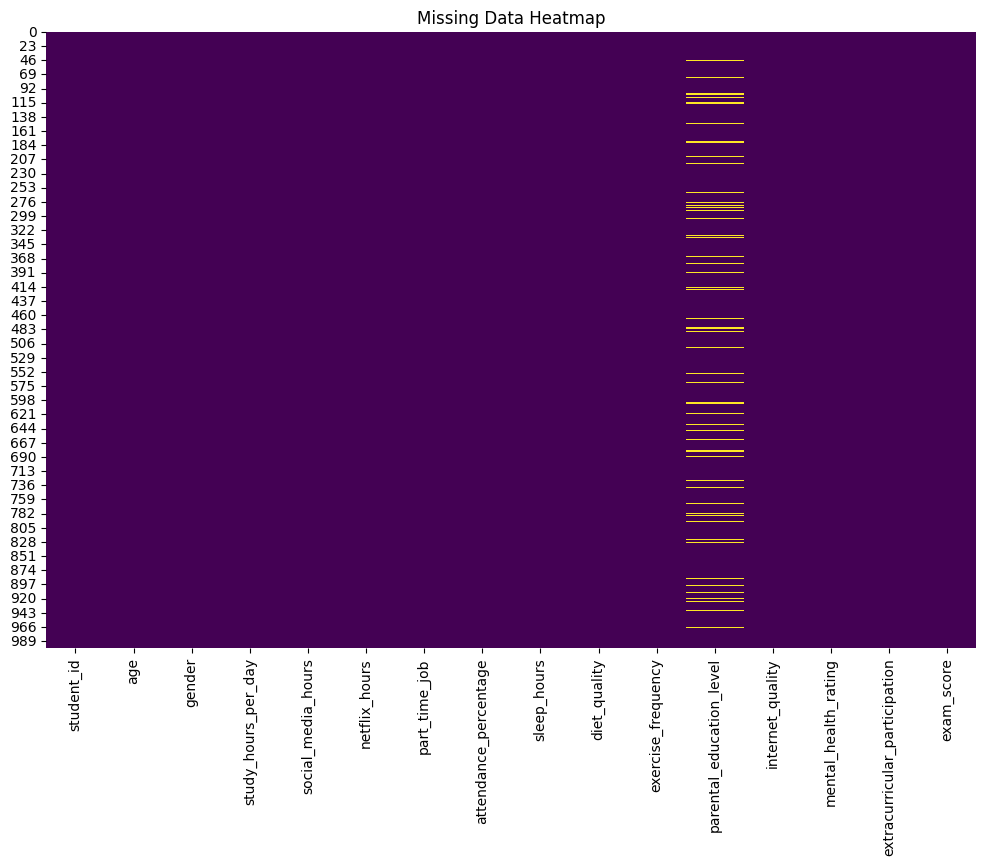

Descriptive statistics for numerical columns:
             age  study_hours_per_day  social_media_hours  netflix_hours  \
count  1000.0000           1000.00000         1000.000000    1000.000000   
mean     20.4980              3.55010            2.505500       1.819700   
std       2.3081              1.46889            1.172422       1.075118   
min      17.0000              0.00000            0.000000       0.000000   
25%      18.7500              2.60000            1.700000       1.000000   
50%      20.0000              3.50000            2.500000       1.800000   
75%      23.0000              4.50000            3.300000       2.525000   
max      24.0000              8.30000            7.200000       5.400000   

       attendance_percentage  sleep_hours  exercise_frequency  \
count            1000.000000  1000.000000         1000.000000   
mean               84.131700     6.470100            3.042000   
std                 9.399246     1.226377            2.025423   
min      

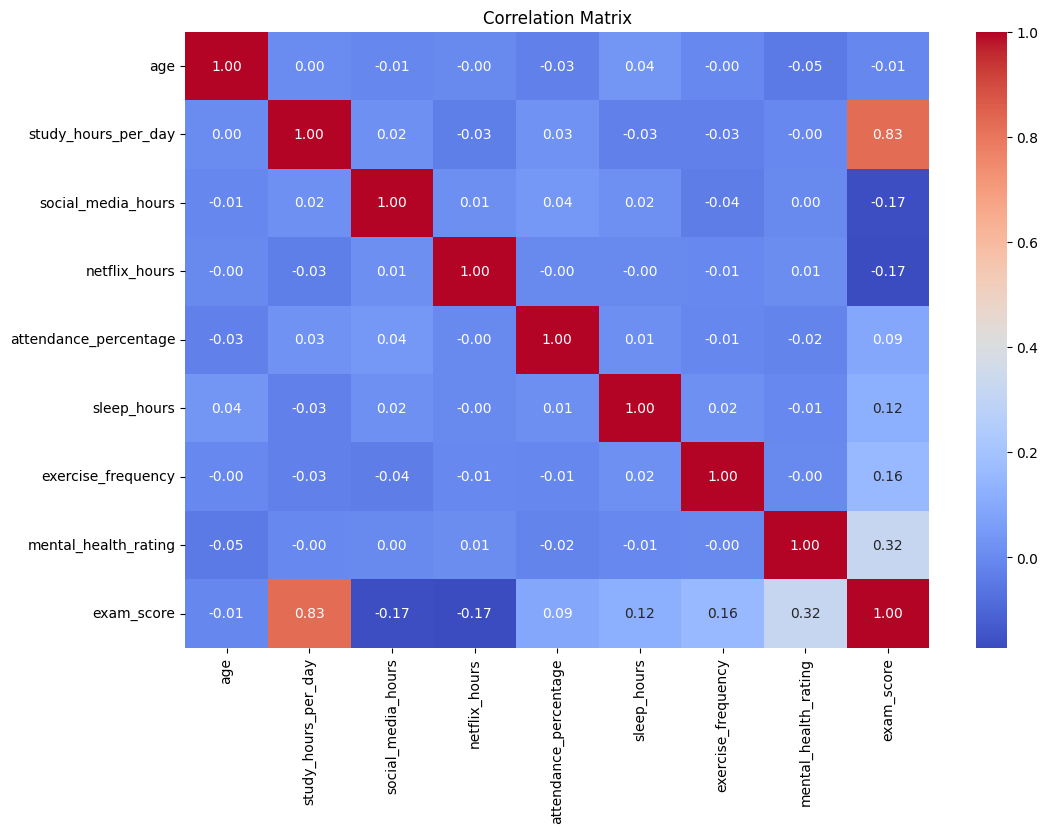

Number of duplicate rows: 0


In [231]:
# Data Exploration

missing_data = data.isnull().sum()
print("Missing data per column:")
print(missing_data)

#  Check the percentage of missing data
missing_percentage = (data.isnull().sum() / len(data)) * 100
print("Percentage of missing data per column:")
print(missing_percentage)

#  Visualize missing data
plt.figure(figsize=(12, 8))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

#  Descriptive statistics for numerical columns
print("Descriptive statistics for numerical columns:")
print(data.describe())


#  Correlation matrix for numerical features
numerical_data = data.select_dtypes(include=[np.number])

# Calculate correlation matrix for numerical features
correlation_matrix = numerical_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

#  Check for duplicate rows
duplicates = data.duplicated().sum()
print(f'Number of duplicate rows: {duplicates}')
# do outliers, feature importance

In [232]:
# fill missing values in the column parental_education_level using mode() which returns the most frequent (common) value in the column
data['parental_education_level'].fillna(data['parental_education_level'].mode()[0], inplace=True)
missing_data = data.isnull().sum()
print("Missing data per column:")
print(missing_data)

Missing data per column:
student_id                       0
age                              0
gender                           0
study_hours_per_day              0
social_media_hours               0
netflix_hours                    0
part_time_job                    0
attendance_percentage            0
sleep_hours                      0
diet_quality                     0
exercise_frequency               0
parental_education_level         0
internet_quality                 0
mental_health_rating             0
extracurricular_participation    0
exam_score                       0
dtype: int64


In [233]:
# classification problem

def categorize_performance(score):
    if score <= 50:
        return "Low"
    elif score <= 75:
        return "Medium"
    else:
        return "High"

data["performance"] = data["exam_score"].apply(categorize_performance)
data

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score,performance
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2,Medium
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0,High
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3,Low
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8,Low
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1,High
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9,Medium
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4,Medium
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Bachelor,Average,1,No,69.7,Medium


In [234]:
# Label encode categorical features (numerical values)
categorical_cols = ['gender', 'part_time_job', 'diet_quality', 'parental_education_level',
                    'internet_quality', 'extracurricular_participation']

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Encode the target variable 'performance'
target_le = LabelEncoder()
data["performance"] = target_le.fit_transform(data["performance"])  # Low=0, Medium=1, High=2
data

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score,performance
0,S1000,23,0,0.0,1.2,1.1,0,85.0,8.0,0,6,2,0,8,1,56.2,2
1,S1001,20,0,6.9,2.8,2.3,0,97.3,4.6,1,6,1,0,8,0,100.0,0
2,S1002,21,1,1.4,3.1,1.3,0,94.8,8.0,2,1,1,2,1,0,34.3,1
3,S1003,23,0,1.0,3.9,1.0,0,71.0,9.2,2,4,2,1,1,1,26.8,1
4,S1004,19,0,5.0,4.4,0.5,0,90.9,4.9,0,3,2,1,1,0,66.4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S1995,21,0,2.6,0.5,1.6,0,77.0,7.5,0,2,1,1,6,1,76.1,0
996,S1996,17,0,2.9,1.0,2.4,1,86.0,6.8,2,1,1,0,6,1,65.9,2
997,S1997,20,1,3.0,2.6,1.3,0,61.9,6.5,1,5,0,1,9,1,64.4,2
998,S1998,24,1,5.4,4.1,1.1,1,100.0,7.6,0,0,0,0,1,0,69.7,2


In [235]:
from sklearn.model_selection import train_test_split

# Drop non-numeric/non-useful columns
data = data.drop(columns=["student_id", "exam_score"]) 

# Separate Features and Labels
X = data.drop("performance", axis=1)
y = data["performance"]


In [236]:

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert labels to one-hot encoding
y_encoded = to_categorical(y)

# Train-validation-test split
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
X_scaled

array([[ 1.08455114, -0.97616309, -2.41806844, ..., -1.08974966,
         0.90018637,  1.46446375],
       [-0.21586989, -0.97616309,  2.28170684, ..., -1.08974966,
         0.90018637, -0.6828438 ],
       [ 0.21760379,  0.76387807, -1.46449085, ...,  1.7370977 ,
        -1.55933923, -0.6828438 ],
       ...,
       [-0.21586989,  0.76387807, -0.37468788, ...,  0.32367402,
         1.25154717,  1.46446375],
       [ 1.51802481,  0.76387807,  1.26001656, ..., -1.08974966,
        -1.55933923, -0.6828438 ],
       [-0.64934357, -0.97616309,  0.51077703, ..., -1.08974966,
         0.90018637, -0.6828438 ]])

In [237]:
import tensorflow as tf
# Defining the Model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(3, activation='softmax')  # 3 classes: Low, Medium, High
])
# Dropout layer: Helps prevent overfitting by randomly disabling some neurons during training.
# optimizer='adam': adjusts the learning rate and other parameters during training to help the model learn more efficiently.
# loss='categorical_crossentropy': loss function used for multi-class classification problems
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 64)                960       
                                                                 
 dropout_30 (Dropout)        (None, 64)                0         
                                                                 
 dense_46 (Dense)            (None, 32)                2080      
                                                                 
 dropout_31 (Dropout)        (None, 32)                0         
                                                                 
 dense_47 (Dense)            (None, 3)                 99        
                                                                 
Total params: 3139 (12.26 KB)
Trainable params: 3139 (12.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [238]:
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=30,
                    batch_size=32)


Epoch 1/30
22/22 [==============================] - 0s 5ms/step - loss: 1.0321 - accuracy: 0.4429 - val_loss: 0.9418 - val_accuracy: 0.5600
Epoch 2/30
22/22 [==============================] - 0s 2ms/step - loss: 0.9488 - accuracy: 0.5414 - val_loss: 0.8840 - val_accuracy: 0.5933
Epoch 3/30
22/22 [==============================] - 0s 2ms/step - loss: 0.8666 - accuracy: 0.6071 - val_loss: 0.8137 - val_accuracy: 0.6467
Epoch 4/30
22/22 [==============================] - 0s 2ms/step - loss: 0.7862 - accuracy: 0.6700 - val_loss: 0.7380 - val_accuracy: 0.7333
Epoch 5/30
22/22 [==============================] - 0s 2ms/step - loss: 0.7285 - accuracy: 0.6686 - val_loss: 0.6648 - val_accuracy: 0.7533
Epoch 6/30
22/22 [==============================] - 0s 2ms/step - loss: 0.6395 - accuracy: 0.7257 - val_loss: 0.6064 - val_accuracy: 0.7533
Epoch 7/30
22/22 [==============================] - 0s 2ms/step - loss: 0.5935 - accuracy: 0.7371 - val_loss: 0.5609 - val_accuracy: 0.7600
Epoch 8/30
22/22 [==

In [240]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")


5/5 [==============================] - 0s 1ms/step - loss: 0.4099 - accuracy: 0.7867
Test Accuracy: 0.79


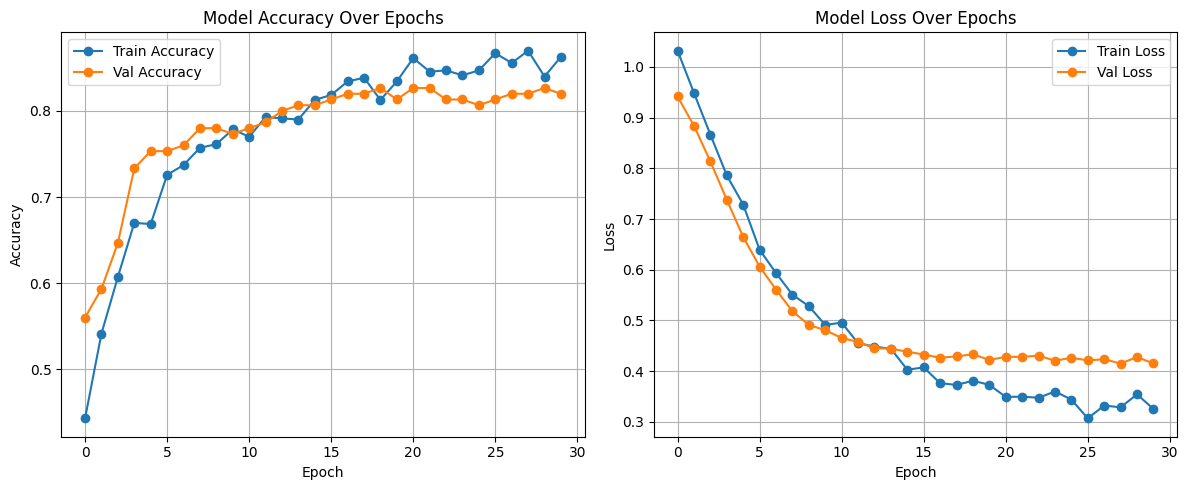

In [241]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', marker='o')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Val Loss', marker='o')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [242]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE) and R2 Score
mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
# print(f'R2 Score: {r2}')

5/5 [==============================] - 0s 1ms/step
Mean Squared Error: 0.08770201355218887


In [243]:
from sklearn.dummy import DummyRegressor

# Train a baseline model (predicting the mean)
baseline_model = DummyRegressor(strategy='mean')
baseline_model.fit(X_train, y_train)
y_baseline_pred = baseline_model.predict(X_test)

# Calculate baseline performance
baseline_mse = mean_squared_error(y_test, y_baseline_pred)
print(f'Baseline Model MSE: {baseline_mse}')

Baseline Model MSE: 0.2049160748720169


In [244]:
# smaller there for doing good

In [245]:
#2
# Objective:
# To predict student academic performance as one of three classes (Low, Medium, High) based on their habits, environment, and background. This is a multi-class classification problem.

In [246]:
#3.
# Dropped student_id as it’s an identifier and not useful for learning.
# New target label: The exam_score was converted into a categorical label(Perfomance)
# converting categorical vvalues to numerical values